# **Regression Project: Boston House Price Prediction**

# **Marks: 60**

Welcome to the project on regression. We will use the **Boston house price dataset** for this project.

-------------------------------
## **Objective**
-------------------------------

The problem at hand is to **predict the housing prices of a town or a suburb based on the features of the locality provided to us**. In the process, we need to **identify the most important features affecting the price of the house**. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for the unseen data.

----------------------------
## **Dataset|
---------------------------

Each record in the database describes a house in Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below:

Attribute Information:

- **CRIM:** Per capita crime rate by town
- **ZN:** Proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS:** Proportion of non-retail business acres per town
- **CHAS:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX:** Nitric Oxide concentration (parts per 10 million)
- **RM:** The average number of rooms per dwelling
- **AGE:** Proportion of owner-occupied units built before 1940
- **DIS:** Weighted distances to five Boston employment centers
- **RAD:** Index of accessibility to radial highways
- **TAX:** Full-value property-tax rate per 10,000 dollars
- **PTRATIO:** Pupil-teacher ratio by town
- **LSTAT:** % lower status of the population
- **MEDV:** Median value of owner-occupied homes in 1000 dollars

## **Importing the necessary libraries**

In [85]:
# Import libraries for data manipulation
import pandas as pd

import numpy as np

# Import libraries for data visualization
import matplotlib.pyplot as plt

import seaborn as sns

from statsmodels.graphics.gofplots import ProbPlot

# Import libraries for building linear regression model
from statsmodels.formula.api import ols

import statsmodels.api as sm

from sklearn.linear_model import LinearRegression

# Import library for preparing data
from sklearn.model_selection import train_test_split

# Import library for data preprocessing
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

### Loading the dataset

In [86]:
df = pd.read_csv("C:/Users/14342/Desktop/Boston.csv") #turning data into a dataframe. This will not change the original Data.

df.head()  #Display the first 5 rows of our data set 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


## Data Overview

- Observations
- Sanity checks

In [87]:
df.info() #Summary of data / data type of each column. All varialbes are Float or Integers. There are no null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [88]:
df.shape #Display the dimensions of our dataset 506 non-null observations in each of the columns. There are no missing values. There are 13 columns in the dataset and every column is of numeric data type.

(506, 13)

## Preprocessing
- Missing Value treatment
- Log transformation of dependent variable if skewed
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [89]:
df.isnull() #Check for missing values

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False


In [90]:
df.describe().T #Statistical summary of our data // Mean, Standard deviation, Minimum value, 1st percentile, 2nd percentile, 3rd percentile of the columns with numeric values. Counts the number of variables in dataset


,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


- The per capita crime rate by town average is 3.6 with a max of 89. 89 is 10 Standad Deviations higher than the average and is an outlier. The proportion of residental land zone for lots over 25,000 sq ft is on average 11.36, while the max is 100. That is 4.2 Standard Deviations greater than the average and is an outlier.  

- The owner-occupied unites built before 1940 is on average 68 with a max of 100. The distance to five Boston employment centers is on average 3.79 miles with the maximum being 12.12 miles. The full-value property tax rate per 10,000 dollars is on average 408 dollars while the maximum is 711 dollars.

In [91]:
df.tail() #Display the last 5 rows of our dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,7.88,11.9


In [92]:
df.corr().T #Correlation check across columns

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536


- We can see that INDUS(Proportion of non-retail business acres per town) has a 76% correlation to NOX (Nitric Oxide concentration (parts per 10 millon). INDUS also has a 72% correlation to TAX (Full-value property tax rate per 10,000 dollars. INDUS has a negative 70% correlation to DIS (weighted distances to five Boston employment centers).

- NOX(Nitric Oxide concentration parts per 10million) has a positive 73% correlation to AGE (Proportion of onwer occupied units built before 1940). NOX has a negative 74% correlation to DIS(distances to five Boston employment centers).

- RAD (Index of accessibility to radial highways) has a 91% correlation to TAX(Full value property tax rate per 10,000 dollars)

- LSTAT(percent lower status of population) has a negative 73% correlation to MEDV(Median Value of owner-occupied homes in 1000 dollars)




In [93]:
df.value_counts() #Returns each unique value in the DataFrame

CRIM      ZN    INDUS  CHAS  NOX    RM     AGE    DIS      RAD  TAX  PTRATIO  LSTAT  MEDV
0.00632   18.0  2.31   0     0.538  6.575  65.2   4.0900   1    296  15.3     4.98   24.0    1
1.00245   0.0   8.14   0     0.538  6.674  87.3   4.2390   4    307  21.0     11.98  21.0    1
1.38799   0.0   8.14   0     0.538  5.950  82.0   3.9900   4    307  21.0     27.71  13.2    1
1.35472   0.0   8.14   0     0.538  6.072  100.0  4.1750   4    307  21.0     13.04  14.5    1
1.34284   0.0   19.58  0     0.605  6.066  100.0  1.7573   5    403  14.7     6.43   24.3    1
                                                                                            ..
0.11027   25.0  5.13   0     0.453  6.456  67.8   7.2255   8    284  19.7     6.73   22.2    1
0.10959   0.0   11.93  0     0.573  6.794  89.3   2.3889   1    273  21.0     6.48   22.0    1
0.10793   0.0   8.56   0     0.520  6.195  54.4   2.7778   5    384  20.9     13.00  21.7    1
0.10659   80.0  1.91   0     0.413  5.936  19.5   10.58

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions:**

1. What does the distribution of 'MEDV' look like?
2. What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables?
3. What are all the inferences that can be found by doing univariate analysis for different variables?
4. Do bivariate analysis to visualize the relationship between the features having significant correlations (>= 0.7 or <= -0.7)

# Univariate Analysis

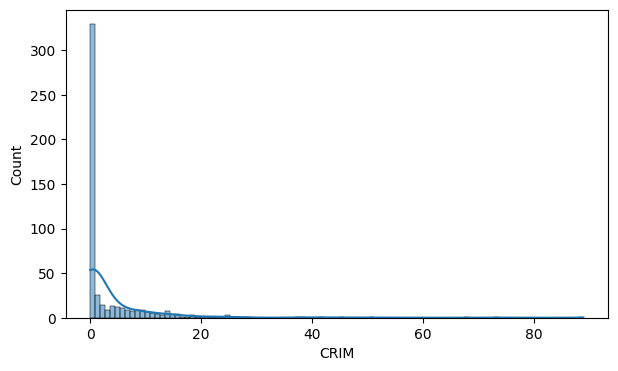

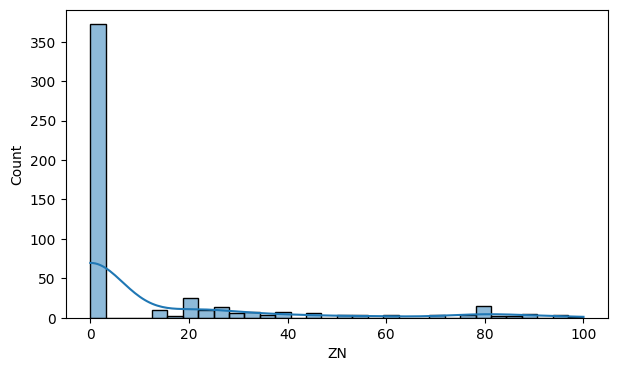

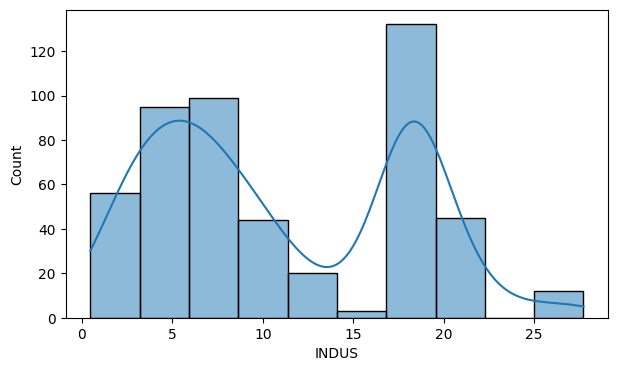

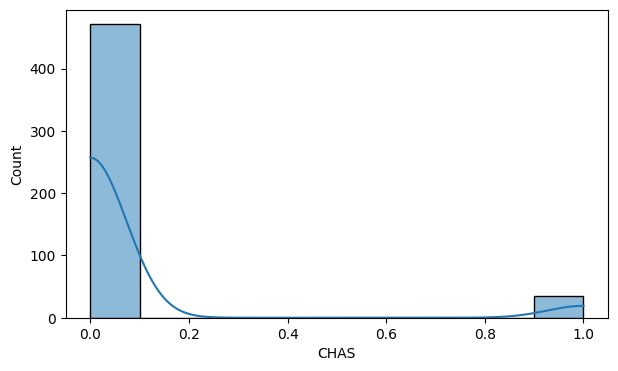

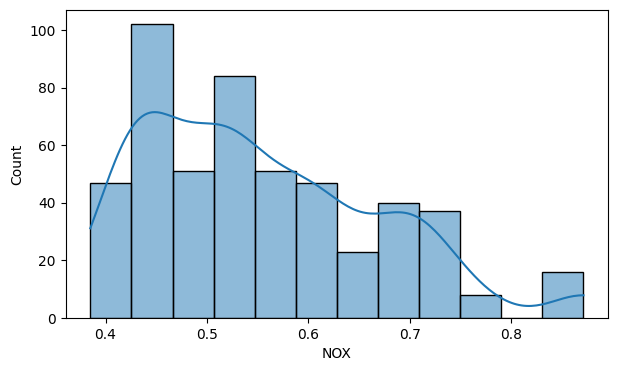

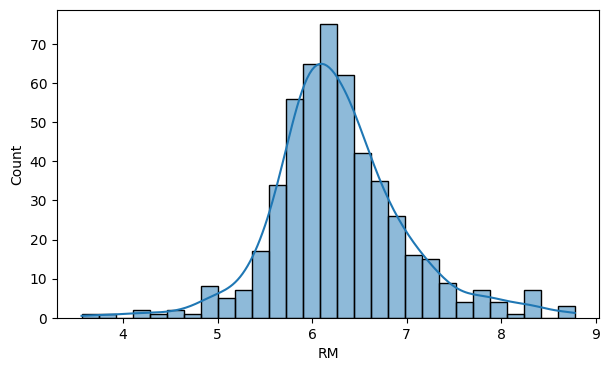

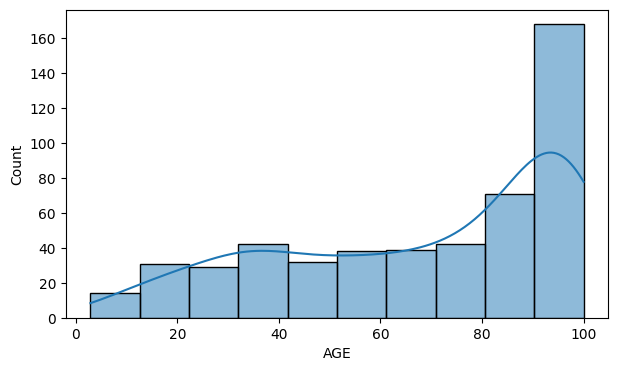

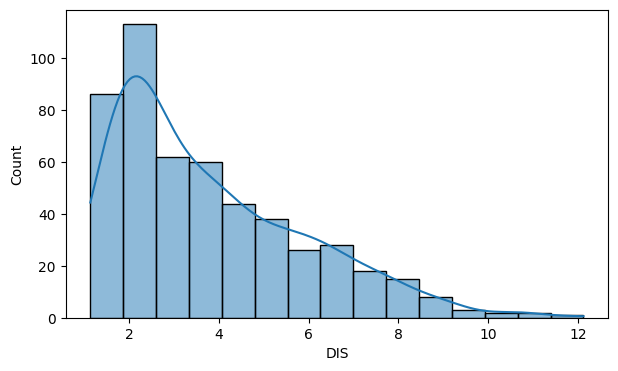

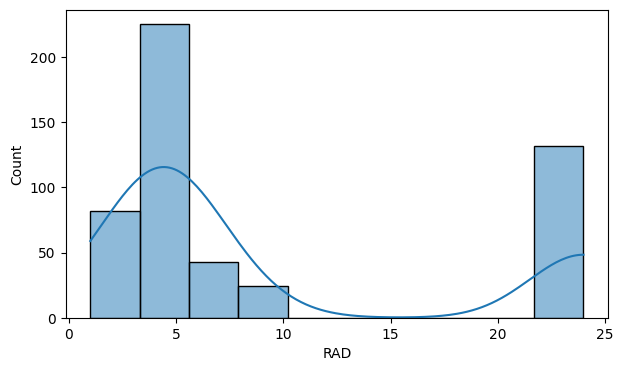

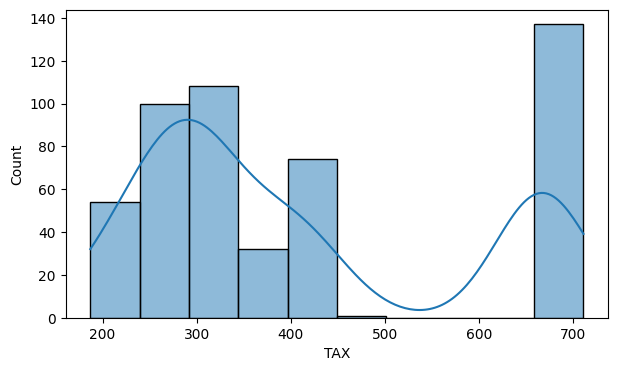

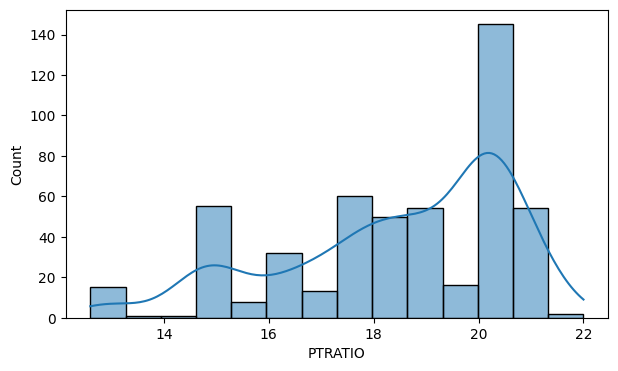

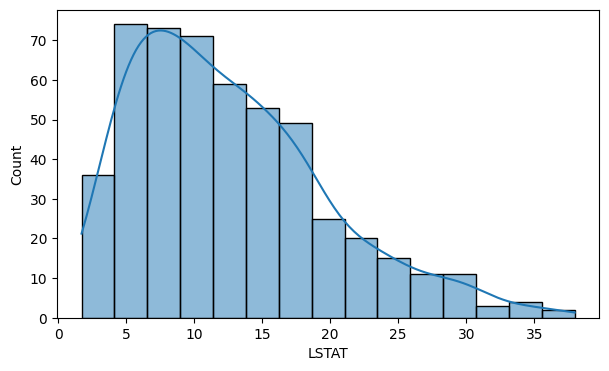

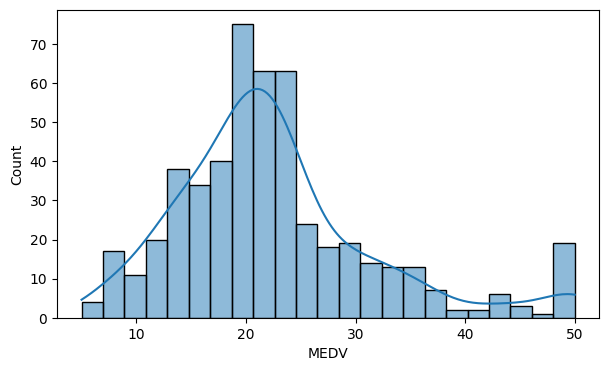

In [94]:
# Plotting all the columns to look at their distributions
for i in df.columns:
    
    plt.figure(figsize = (7, 4))
    sns.histplot(data = df, x = i, kde = True)
    plt.show()

In [95]:
df['MEDV_log'] = np.log(df['MEDV'])

<Axes: xlabel='MEDV_log', ylabel='Count'>

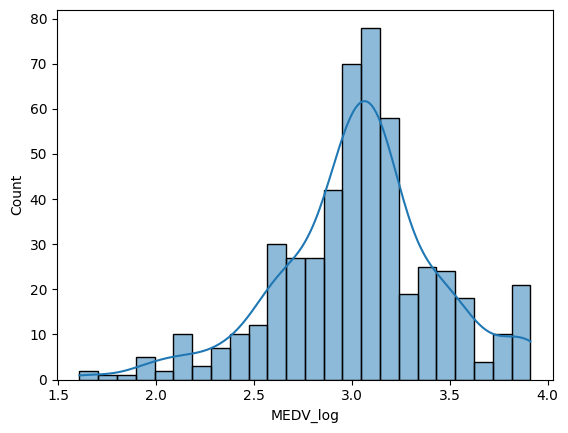

In [96]:
sns.histplot(data = df, x = 'MEDV_log', kde = True)

**Observation:**

- The log-transformed variable (**MEDV_log**) appears to have a nearly normal distribution without skew, and hence we can proceed.

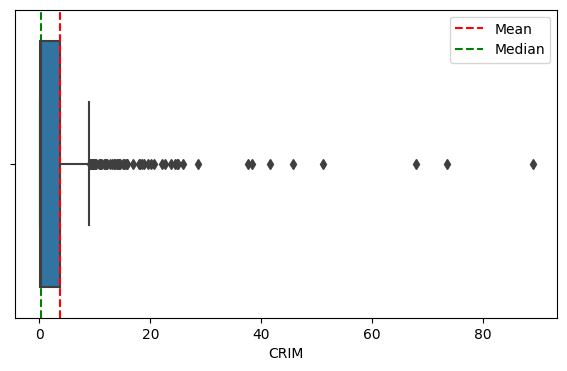

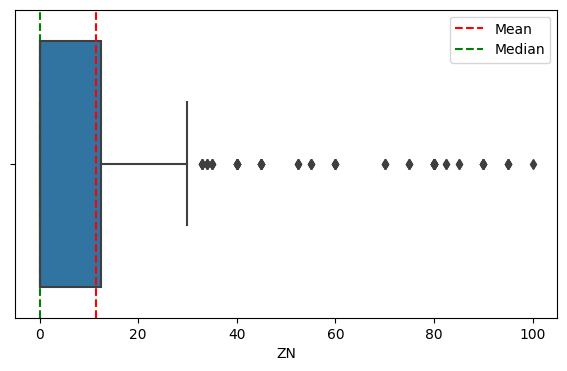

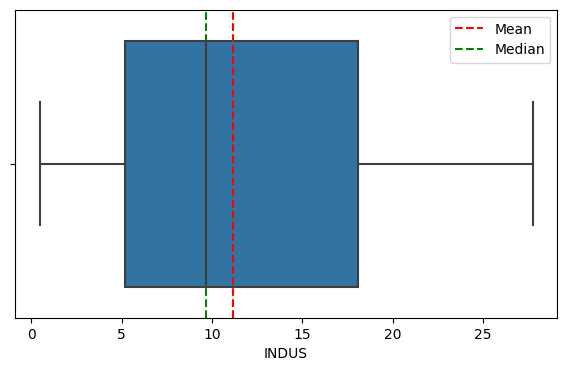

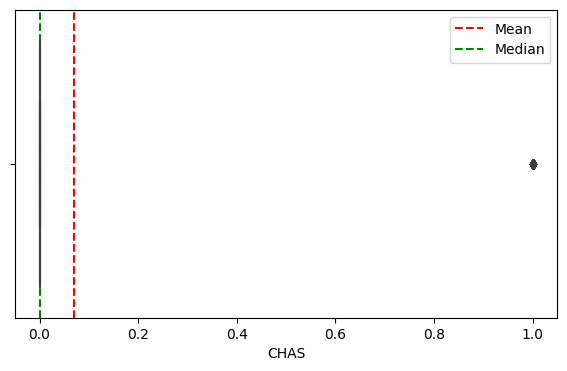

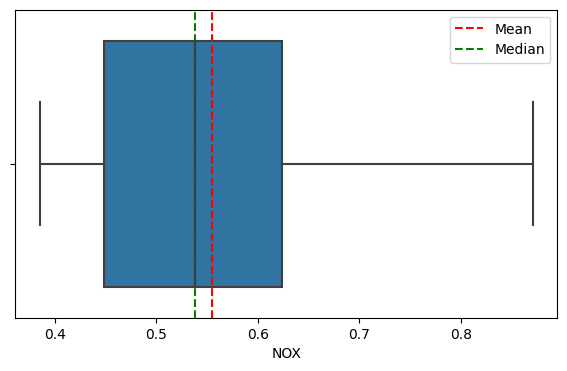

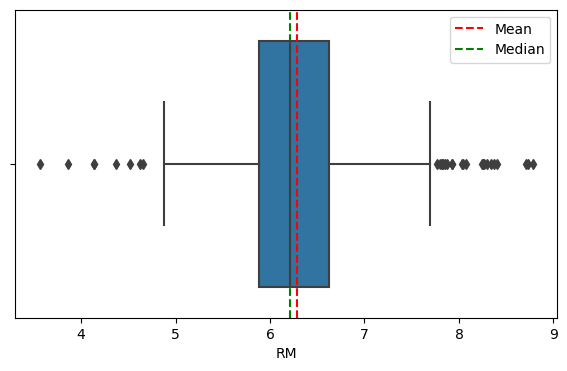

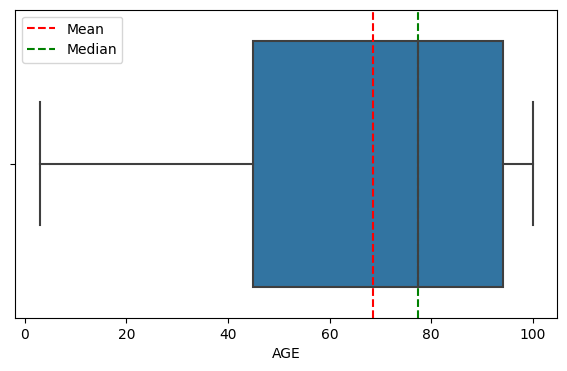

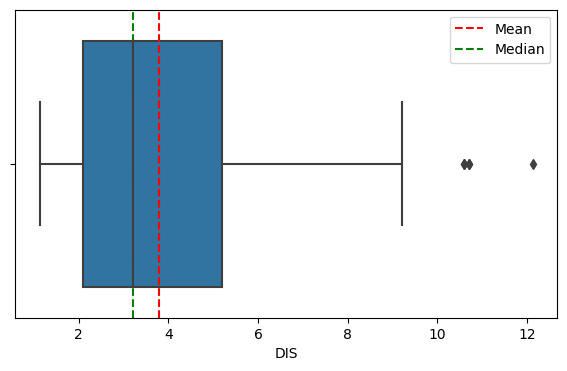

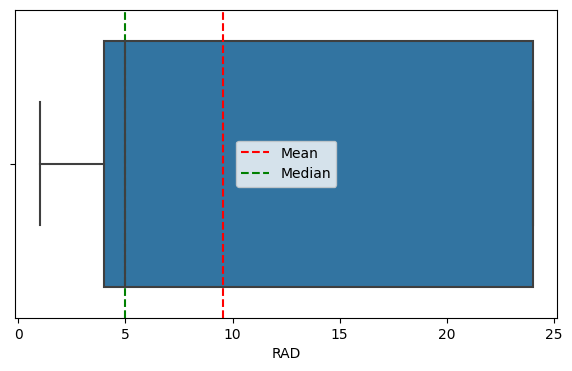

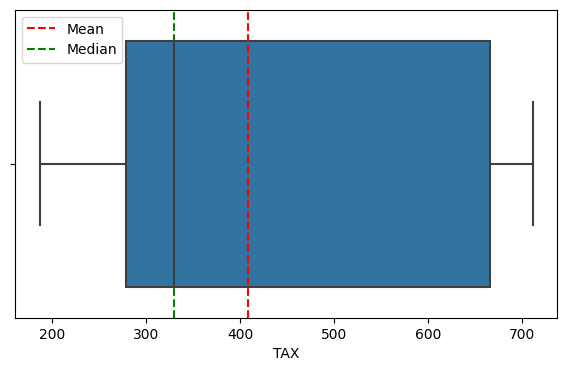

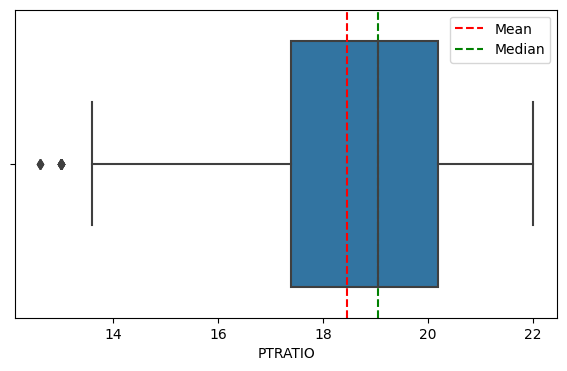

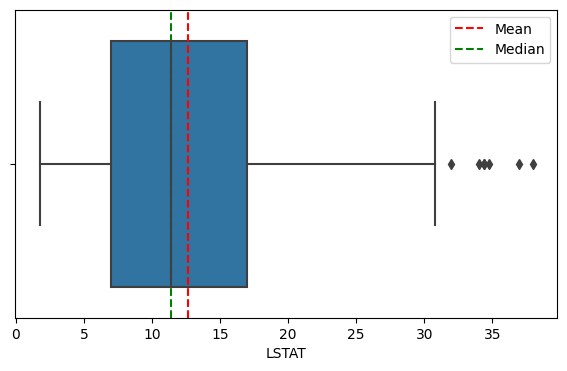

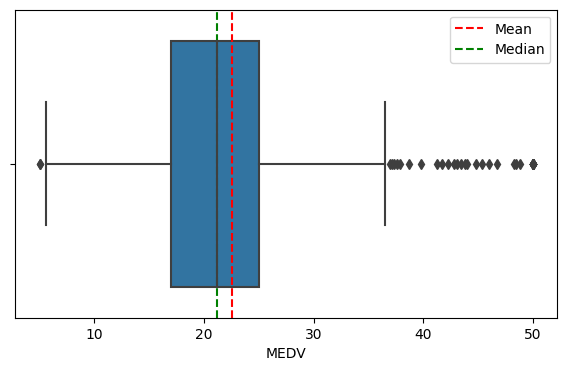

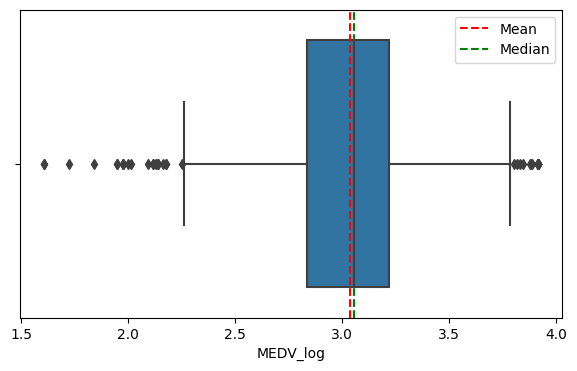

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting all the columns to look at their distributions
for i in df.columns:
    plt.figure(figsize=(7, 4))
    sns.boxplot(data=df, x=i)
    
    # Calculate mean and median
    mean_val = df[i].mean()
    median_val = df[i].median()
    
    # Add mean and median lines
    plt.axvline(mean_val, color='r', linestyle='--', label='Mean')
    plt.axvline(median_val, color='g', linestyle='--', label='Median')
    
    plt.legend()  # Add legend
    plt.show()



# Bivariate Analysis

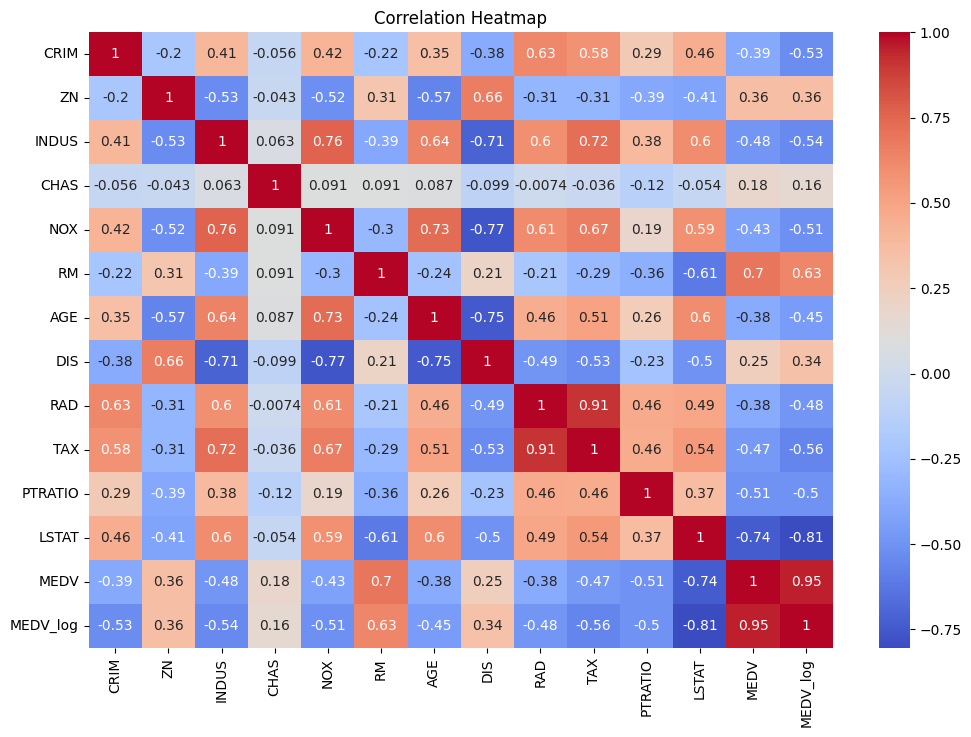

In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Remove duplicate columns
df = df.loc[:,~df.columns.duplicated()]

# Create correlation matrix
corr_matrix = df.corr()

# Generate heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


- We can see the 76% correlation between INDUS and NOX and 72% correlation between INDUS and tax. 
- We see that DIS has a negative 71% correlation to INUDS and a negative 77% correlation to NOX.
- We see that RAD has a 91% percent correlation to TAX.
- We see that LSTAT has a negative 81% correlation to MDEV_log.



# Visualizing the relationship between features with strong correlations (>=0.7 or <=-0.7)

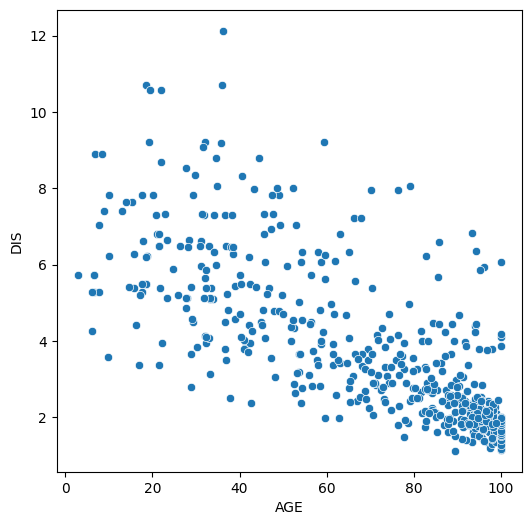

In [99]:
# Scatterplot to visualize the relationship between AGE and DIS
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'AGE', y = 'DIS', data = df)

plt.show()

**Observations:**
- The distance of houses to the Boston employment centers appears to decrease as the proportion of old homes increase in the town. This would suggest that the Boston employment centers are located in older established towns where there is a relativley larger proportion of owner-occupoied units built prior to 1940.

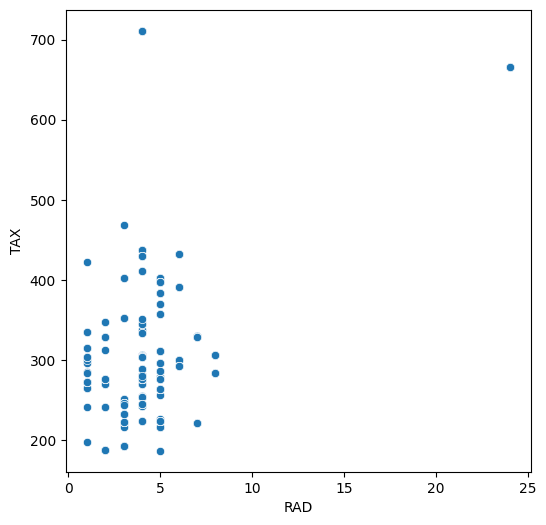

In [100]:
# Scatterplot to visulaize the relationship between RAD and TAX
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'RAD', y = 'TAX', data = df)

plt.show()

**Observations:**
- There is a high correlation between RAD and TAX but no discernable trend.
- There are two clear outliers that may be skewing the correlation.

In [101]:
# Remove the data corresponding to high tax rate
df2 = df[df['TAX'] < 600]

# Import the required function
from scipy.stats import pearsonr

# Calculate the correlation
print('The correlation between TAX and RAD is', pearsonr(df2['TAX'], df2['RAD'])[0])

The correlation between TAX and RAD is 0.24975731331429202


**Observation:**
- The correlation is high due to the outliers. After removing them we can see the correlation drops to roughly 25% from 91%.

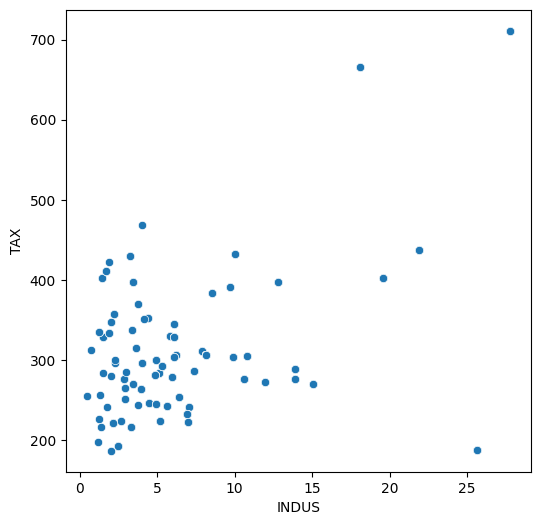

In [102]:
# Scatterplot to visualize the relationship between INDUS and TAX
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'INDUS', y = 'TAX', data = df)

plt.show()

**Observations:**
- There does not seem to be a discrenable trend. Let's remove the outliers and see how our correlation looks.

In [103]:
# Remove the data corresponding to high tax rate
df3 = df[df['TAX'] < 600]

# Import the required function
from scipy.stats import pearsonr

# Calculate the correlation
print('The correlation between TAX and INDUS is', pearsonr(df3['TAX'], df3['INDUS'])[0])

The correlation between TAX and INDUS is 0.4155020562916525


After removing the outliers we can see the correlation drops to 41% from 72%.

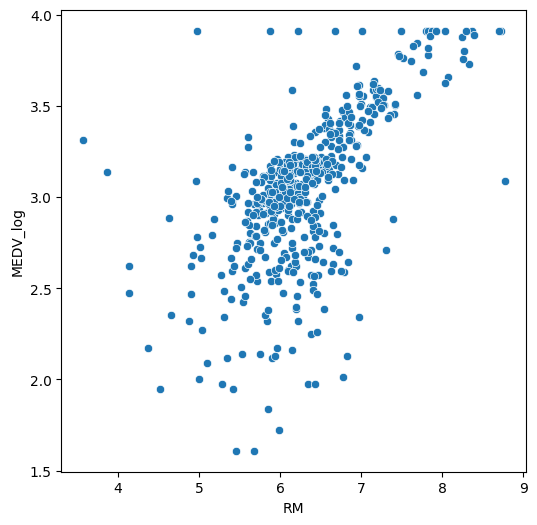

In [104]:
# Scatterplot to visulaize the relationship between RM and MEDV_log
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'RM', y = 'MEDV_log', data = df)

plt.show()

**Observations:**

- The median price of homes seem to increase as the value of RM increases. This is expected beucase a home with more rooms usually has more square feet.

- There are a few outliers in a horizontal line as the MEDV value seems to be capped at 50.

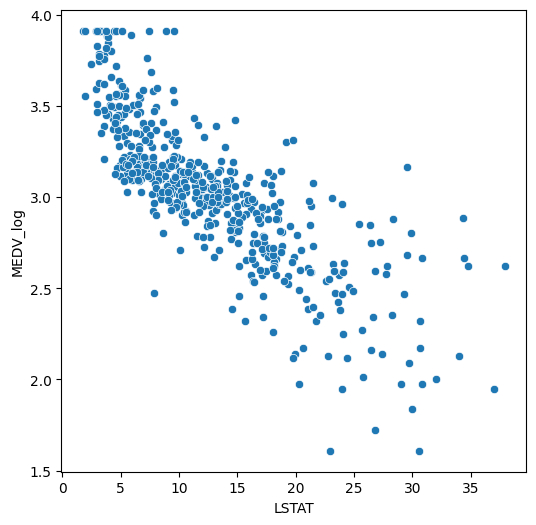

In [105]:
# Scatterplot to visulaize the relationship between LSTAT and MEDV_log
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'LSTAT', y = 'MEDV_log', data = df)

plt.show()

**Observations:**

- The median price of homes tend to decrease with an increase in LSTAT. This makes sense as the home prices are lower in areas where lower status people live.
- There are a few outliers and the data seems to be capped at 50.

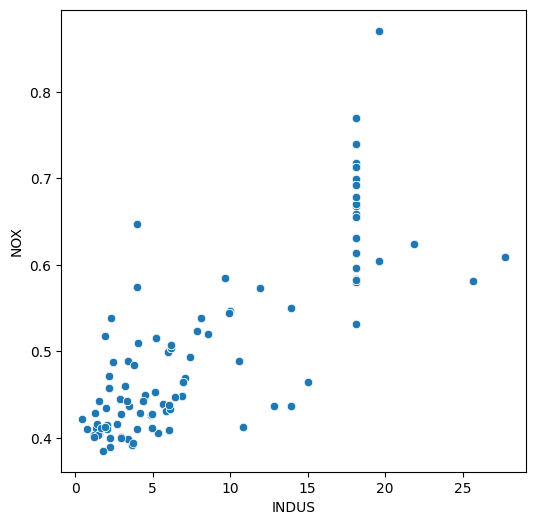

In [106]:
# Scatterplot to visulaize the relationship between INDUS and NOX
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'INDUS', y = 'NOX', data = df)

plt.show()

**Observations:**

- The Nitric Oxide concentration tends to increase with INDUS, or the proporiton of non-retail business acres per town. This makes sense becuase there are more industrial buildings and you would expect higher Nitric Oxide concentrations.

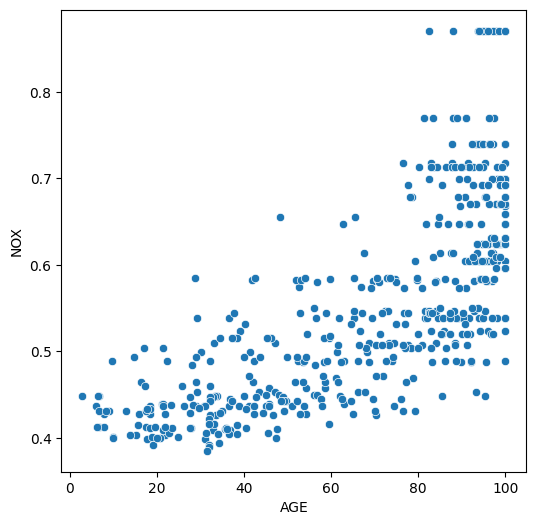

In [107]:
# Scatterplot to visulaize the relationship between AGE and NOX
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'AGE', y = 'NOX', data = df)

plt.show()

**Observations:**

- The nitric oxide concentration tends to increase with the proportion of owner-occupied units built before 1940. This is makes sense if these homes are in established areas that have a higher population density.
- There are few outliers and the data seems to be capped at 1.0

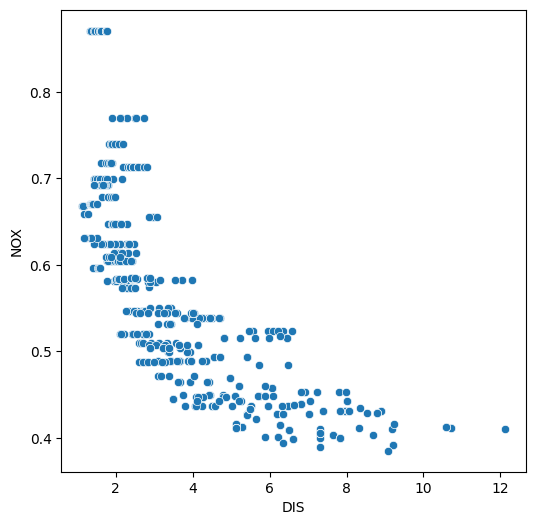

In [108]:
# Scatterplot to visulaize the relationship between DIS and NOX
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'DIS', y = 'NOX', data = df)

plt.show()

**Observations:**

- The nitric oxide concentration tends to decrease as you move further away from the employment centers. This is makes sense that if you are moving further away from the industrial bulidings that the Nitric Oxide concentration goes down.
- There are few outliers and the data seems to be capped at 1.0

### **Split the dataset**

Let's split the data into the dependent and independent variables and further split it into train and test set in a ratio of 70:30 for train and test sets.

In [109]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV', 'MEDV_log'],
      dtype='object')

In [110]:
# Separate the dependent variable and indepedent variables
Y = df['MEDV_log']

X = df.drop(columns = {'MEDV', 'MEDV_log'})

# Add the intercept term
X = sm.add_constant(X)

In [111]:
# splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

In [112]:
# Measuring the Shape of our training and test data
print("Shape of Training set:", X_train.shape)
print("Shape of Test set:", X_test.shape)

Shape of Training set: (354, 13)
Shape of Test set: (152, 13)


### **Check for Multicollinearity**

We will use the Variance Inflation Factor (VIF), to check if there is multicollinearity in the data.

Features having a VIF score > 5 will be dropped / treated till all the features have a VIF score < 5

In [113]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


print(checking_vif(X_train))

    feature         VIF
0     const  535.372593
1      CRIM    1.924114
2        ZN    2.743574
3     INDUS    3.999538
4      CHAS    1.076564
5       NOX    4.396157
6        RM    1.860950
7       AGE    3.150170
8       DIS    4.355469
9       RAD    8.345247
10      TAX   10.191941
11  PTRATIO    1.943409
12    LSTAT    2.861881


**Observations:**

- There are two variables with a high VIF - RAD and TAX (greater than 5). 
- Let's remove TAX as it has the highest VIF values and check the multicollinearity again.

In [114]:
# Create the model after dropping TAX
X_train = X_train.drop('TAX', axis=1) ## Dropping 'TAX' due to high VIF score

# Check for VIF
print(checking_vif(X_train))

    feature         VIF
0     const  532.025529
1      CRIM    1.923159
2        ZN    2.483399
3     INDUS    3.270983
4      CHAS    1.050708
5       NOX    4.361847
6        RM    1.857918
7       AGE    3.149005
8       DIS    4.333734
9       RAD    2.942862
10  PTRATIO    1.909750
11    LSTAT    2.860251


Now we will create the linear regression model as the VIF is less than 5 for all the independent variables and we can assume that multicollinearity has been removed between the variables.

## **Model Building**

* We will be using different metrics functions defined in sklearn like RMSE, MAE, 𝑅2, Adjusted 𝑅2, and MAPE for regression models evaluation. We will define a function to calculate these metric.
* The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average of absolute percentage error for all data points. The absolute percentage error is defined as predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.

In [115]:
# Function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# Function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    pred = model.predict(predictors)                  # Predict using the independent variables
    r2 = r2_score(target, pred)                       # To compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)    # To compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # To compute RMSE
    mae = mean_absolute_error(target, pred)           # To compute MAE
    mape = mape_score(target, pred)                   # To compute MAPE

    # Creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [116]:
import statsmodels.api as sm

# Statsmodel API does not add a constant by default. We need to add it explicitly.
X_train1 = sm.add_constant(X_train)

# Add constant to test data
X_test1 = sm.add_constant(X_test)

# Train the model
olsmodel1 = sm.OLS(y_train, X_train1).fit()

# Get the model summary
olsmodel1.summary()
print(olsmodel1.summary())

                            OLS Regression Results                            
Dep. Variable:               MEDV_log   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     103.3
Date:                Tue, 23 May 2023   Prob (F-statistic):          1.40e-101
Time:                        21:48:25   Log-Likelihood:                 76.596
No. Observations:                 354   AIC:                            -129.2
Df Residuals:                     342   BIC:                            -82.76
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6324      0.243     19.057      0.0

We see that the R-squared value is 76.9%.  So the proportion of variance in the dependent variable (MEDV) that is explained by the independent variables is equal to 76.9%. We also want to look at the Adjusted R-Squared value abecause it takes into account the number of predictors and sample size. This is a better measure of the model's "goodness of fit". The Adjusted R-Squared value is 76.1%.

The regression coefficients corresponding to ZN, AGE, and INDUS are not statistically significant at level α = 0.05. This means these that the regression coefficents corresponding to these three features are not significantly different from 0 in the population. Therefore, we will drop these three features and create a new model.

In [117]:
# Create the model after dropping columns 'MEDV', 'MEDV_log', 'TAX', 'ZN', 'AGE', 'INDUS' from df DataFrame
Y = df['MEDV_log']
X = df.drop(['MEDV','TAX', 'ZN', 'AGE', 'INDUS', 'MEDV_log'], axis=1)  # Pass the column names as a list

X = sm.add_constant(X)

# Splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

# Create the model
olsmodel2 = sm.OLS(y_train, X_train).fit()

# Get the model summary
olsmodel2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MEDV_log   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     142.1
Date:                Tue, 23 May 2023   Prob (F-statistic):          2.61e-104
Time:                        21:48:25   Log-Likelihood:                 75.486
No. Observations:                 354   AIC:                            -133.0
Df Residuals:                     345   BIC:                            -98.15
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6494      0.242     19.242      0.000       4.174       5.125
CRIM          -0.0125      0.002     -7.349      0.000      -0.016      -0.009
CHAS           0.1198      0.039      3.093      0.002       0.044       0.196
NOX           -1.0562      0.168     -6.296      0.000      -1.386      -0.726
RM             0.0589      0.020      2.928      0.004       0.019       0.098
DIS           -0.0441      0.008     -5.561      0.000      -0.060      -0.028
RAD            0.0078      0.002      3.890      0.000       0.004       0.012
PTRATIO       -0.0485      0.006     -7.832      0.000      -0.061      -0.036
LSTAT         -0.0293      0.002    -12.949      0.000      -0.034      -0.025
==============================================================================
Omnibus:                       32.514   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.354
Skew:                           0.408   Prob(JB):                     1.07e-19
Kurtosis:                       5.293   Cond. No.                         690.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Observations:**

- R-Squared value is 76.7%, suggesting that the model explains 76.7% percent of the variability in the dependent variable 
- Adjusted R-Squared is 76.2%, indicating a relativley good fit.
- F-Statistic is large (2.61e-104) and the p-values for the independent variables are less than 0.05 in our final model, indicating that they are statistically significant toward MEDV (Median value of owner-occupied homes in 1000 dollars) price prediction; indicating the model's significance 

In [118]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


# Checking performance on the training data
linear_reg_train = model_performance_regression(olsmodel2, X_train, y_train)
print(linear_reg_train)

# Checking performance on the testing data
linear_reg_test = model_performance_regression(olsmodel2, X_test, y_test)
print(linear_reg_test)


       RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.195504  0.143686   0.767174        0.761082  4.981813
       RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.198045  0.151284   0.772486        0.758066  5.257965


**Observations:**

- The Root Mean Squared Error and the adjusted R-Squared of the training and test data are close, indicating that our model may not be overfitting to the training data.

- Mean Absolute Error (MAE) indicates that the current model can predict Median value of owner-occupied homes in 1000 dollars (MDEV) within mean error of .15 or 150 dollars.

- The units of both RMSE and MAE are the same, ie 1000 dollars in this case. But RMSE is greater than MAE because it penalizes for outliers.

- Mean Absolute Percentage Error is 5.25% on the test data, indicating that the average difference between the predicted value and the actual value is 5.25%.

### **1. Check for mean residuals**

In [119]:
# Residuals
residuals = olsmodel2.resid

In [120]:
residuals.mean()

-4.228883407922489e-15

- The mean of residuals is very close to 0. Hence, the corresponding assumption is satisfied.

### **2. Test for Normality**

<Axes: ylabel='Count'>

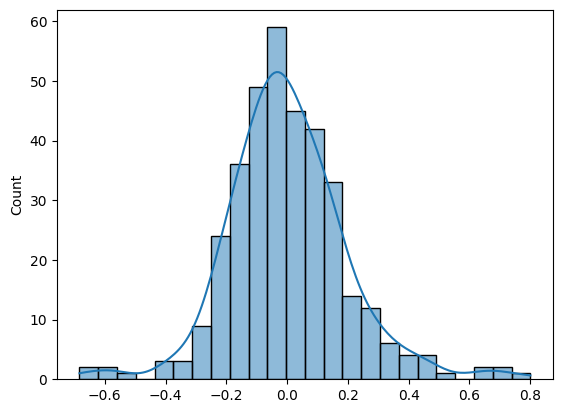

In [121]:
# Plot histogram of residuals
sns.histplot(residuals, kde=True)

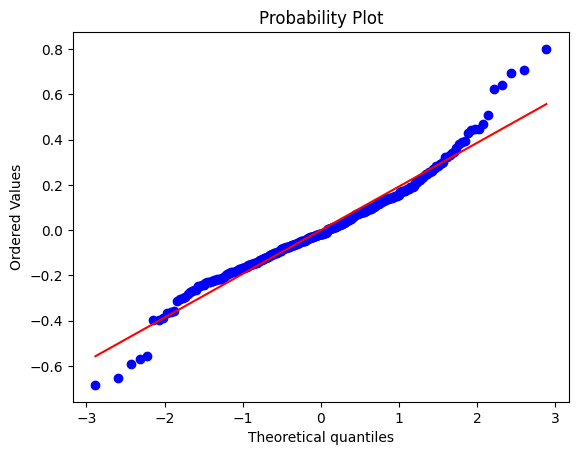

In [122]:
# Plot q-q plot of residuals
import pylab

import scipy.stats as stats

stats.probplot(residuals, dist = "norm", plot = pylab)

plt.show()

- The residuals have a close to normal distribution. The assumption of normality is satisfied.

### **3. Linearity of variables**
- It states the predictor variables must have a linear relation with the dependent variable.
- To test the assumption, we'll plot residuals and fitted values on a plot and ensure that residuals do not form a strong pattern. They should be randomly and uniformly scattered on the x-axis.

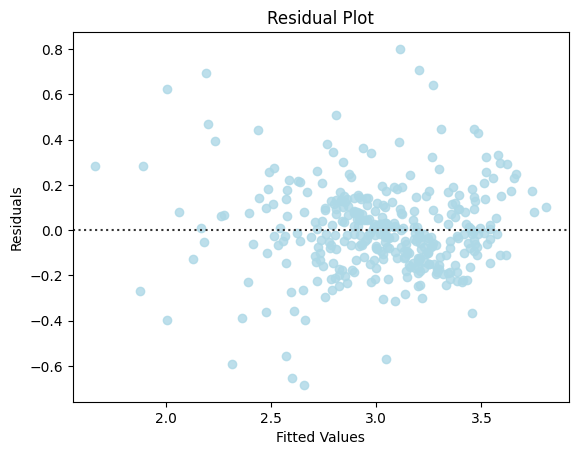

In [123]:
# Predicted values

fitted = olsmodel2.fittedvalues

#Plotting Residuals vs Fitted Values 

sns.residplot(x = fitted, y = residuals, color = "lightblue")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

**Observations**:

- We can observe that there is no pattern in the residuals vs fitted values scatter plot, i.e, the linearity assumption is satisfied 

### **4. Check for homoscedasticity**

## No Heteroscedasticity

- Homoscedasticity: If the variance of the residuals is symmetrically distributed across the regression line, then the data is said to be homoscedastic.

- Heteroscedasticity: If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic. In this case, the residuals can form an arrow shape or any other non-symmetrical shape.

- We will use the Goldfeld-Quandt test to check homoscedasticity:
- Null hypothesis: Residuals are homoscedastic
- Alternative hypothesis: Residuals are heteroscedastic
- alpha = 0.05

In [124]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(residuals, X_train)
lzip(name, test)



[('F statistic', 1.0835082923425288), ('p-value', 0.30190120067669685)]

**Observation**:

 - As we can observe from the above test, the p-value is greater than 0.05. So, we failed to reject the null-hypothesis, i.e, residuals are homoscedastic.

- All the assumptions for the linear regression model are satisfied. With our model's adjusted R-squared value of around 76.2%, we can capture 76.2% of the variation in the data.

- The p-values for the independent variables are less than 0.05 in our model, indicating that they are statistically significant towards MEDV (Median home value) price prediction.

In [125]:
coef = olsmodel2.params
coef

const      4.649386
CRIM      -0.012500
CHAS       0.119773
NOX       -1.056225
RM         0.058907
DIS       -0.044069
RAD        0.007848
PTRATIO   -0.048504
LSTAT     -0.029277
dtype: float64

In [126]:
# Let us write the equation of the model
Equation = "MEDV_log="
print(Equation, end='\t')
for i in range(len(coef)):
    print('(', coef[i], ') * ', coef.index[i], '+', end = ' ')

MEDV_log=	( 4.649385823266653 ) *  const + ( -0.012500455079103653 ) *  CRIM + ( 0.1197731907701969 ) *  CHAS + ( -1.0562253516683322 ) *  NOX + ( 0.058906575109278984 ) *  RM + ( -0.04406889079940582 ) *  DIS + ( 0.007848474606243699 ) *  RAD + ( -0.04850362079499884 ) *  PTRATIO + ( -0.02927704047979712 ) *  LSTAT + 

**Observations:**

**coef**: It represents the change in the output Y due to a change of one unit in the variable (everything else held constant).

 **std err**: It reflects the level of accuracy of the coefficients.
    - The lower it is, the more accurate the coefficients are.
    
   **P > |t|**: The p-value:
   
  * Pr(>|t|): For each independent feature there is a null hypothesis and an alternate hypothesis 

    **Ho:** Null Hypothesis - The independent feature is not significant 
   
    **Ha:** Alternate Hypothesis - The independent feature is significant 
    
   * A p-value of less than 0.05 is considered to be statistically significant.
   
 **Confidence Interval**: It represents the range in which our coefficients are likely to fall (with a likelihood of 95%).


- The MDEV decreases with an increase in CRIM. 1 unit increase in CRIM leads to a decrease in MEDV ~.012 times if everything else holds constant.

- The MDEV increases with an increase in RM. 1 unit increase in RM leads to an increase in MEDV ~0.05 times MDEV 

- The MDEV decreases with an increase in DIS. 1 unit increase in DIS leads to a decrease in MDEV ~0.04 times MDEV.

- The MDEV decreases with an increase in PTRATIO. 1 unit increase in PTRATIO leads to an decrease in MEDV ~0.04 times MDEV

## Model Building - Linear Regression
## Model Performance Check

1. How does the model is performing? Check using Rsquared, RSME, MAE, MAPE
2. Is there multicollinearity? Check using VIF
3. How does the model is performing after cross validation?

In [127]:
from sklearn.linear_model import LinearRegression

# Initialize the model
linear_reg = LinearRegression()

# Fit the model on the training data
linear_reg.fit(X_train, y_train)

LinearRegression()

In [128]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Checking performance on the training data
linear_reg_train = model_performance_regression(linear_reg, X_train, y_train)
print(linear_reg_train)

       RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.195504  0.143686   0.767174        0.761082  4.981813


In [129]:
# Checking performance on the testing data
linear_reg_test = model_performance_regression(linear_reg, X_test, y_test)
linear_reg_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.198045,0.151284,0.772486,0.758066,5.257965


**Observations**
- The Root Mean Squared Error and the adjusted R-Squared of the training and test data are very close, indicating that our model is not overfitting to the training data.
- The adjusted R-Squared of 75.8% implies that the independent variables are able to explain 75.8% of the variance in the target variable.
- Mean Absolute Error (MAE) indicates that the current model can predict Median value of owner-occupied homes in 1000 dollars (MDEV) within mean error of .15 or 150 dollars.
- The units of both RMSE and MAE are the same, ie 1000 dollars in this case. But RMSE is greater than MAE because it penalizes for outliers.
- Mean Absolute Percentage Error is 5.25% on the test data, indicating that the average difference between the predicted value and the actual value is 5.25%

In [130]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each predictor variable
vif = pd.DataFrame()
vif["Variable"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

print(vif)


  Variable         VIF
0    const  526.961418
1     CRIM    1.892679
2     CHAS    1.049602
3      NOX    3.528194
4       RM    1.748438
5      DIS    2.582254
6      RAD    2.838523
7  PTRATIO    1.591527
8    LSTAT    2.437311


All the continuous variables have VIF less than 5, which makes sense according to what we observed in correlation heatmap.

In [131]:
# Import the required function

from sklearn.model_selection import cross_val_score

# Build the regression model and cross-validate
linearregression = LinearRegression()                                    

cv_Score11 = cross_val_score(linearregression, X_train, y_train, cv = 10)
cv_Score12 = cross_val_score(linearregression, X_train, y_train, cv = 10, 
                             scoring = 'neg_mean_squared_error')                                  


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

RSquared: 0.729 (+/- 0.232)
Mean Squared Error: 0.041 (+/- 0.023)


- R-Squared measures the proportion of variance for MEDV_log that is explained by the independent variable in our regression model. The average R-squared value from cross-validation is .729 with a standard deviation of .023.

In [132]:
coef = linear_reg.coef_
intercept = linear_reg.intercept_

df_coef = pd.DataFrame({'Feature': X_train.columns, 'Coefs': coef})
print(df_coef)

   Feature     Coefs
0    const  0.000000
1     CRIM -0.012500
2     CHAS  0.119773
3      NOX -1.056225
4       RM  0.058907
5      DIS -0.044069
6      RAD  0.007848
7  PTRATIO -0.048504
8    LSTAT -0.029277


## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

In [133]:
#Residuals 

y_pred = linear_reg.predict(X_test)

residuals = y_test - y_pred

print(residuals)


307   -0.016119
343   -0.081177
47    -0.073332
67    -0.063048
362    0.111429
         ...   
467    0.146347
95    -0.015617
122    0.162353
260    0.102050
23     0.012625
Name: MEDV_log, Length: 152, dtype: float64


In [134]:
residuals.mean()

-0.014683254240193256

<Axes: xlabel='MEDV_log', ylabel='Count'>

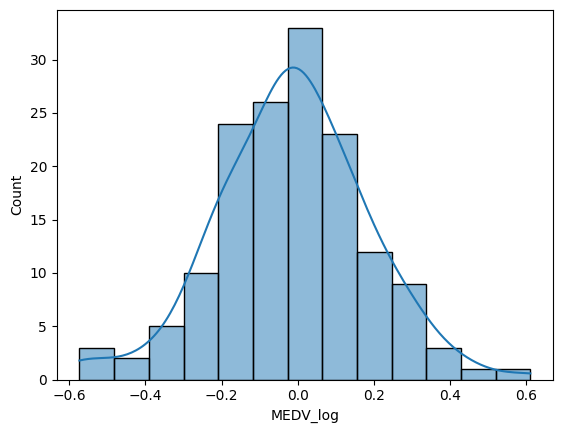

In [135]:
# Plot histogram of residuals
sns.histplot(residuals, kde=True)

- The residuals do have a close to normal distribution. The assumption of normality is satisfied. 

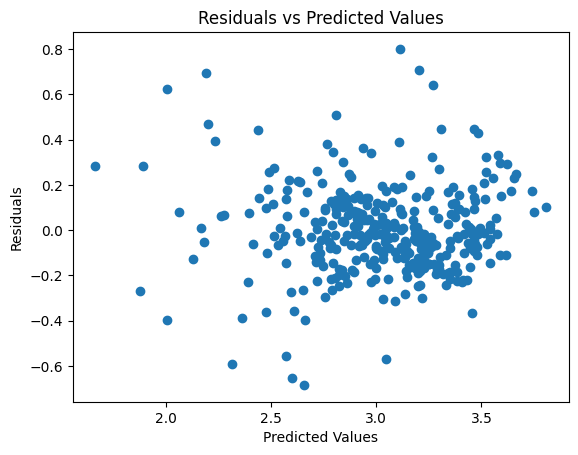

In [136]:
import matplotlib.pyplot as plt

# Get the predicted values
y_pred = linear_reg.predict(X_train)

# Calculate the residuals
residuals = y_train - y_pred

# Plot the residuals against the predicted values
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()


**Observation:**

- As we can observe from the above test, the residuals do not form a symmetic trend.

In [137]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(residuals, X_train)
lzip(name, test)

[('F statistic', 1.0835082923425288), ('p-value', 0.30190120067669685)]

**Observation:**

-  As we can observe from the above test, the p-value is greater than 0.05. So, we fail to reject the null-hypothesis, i.e., residuals are homoscedastic.

In [138]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [139]:
ridge_model = Ridge() #creating Ridge Regression model
ridge_model.fit(X_train, y_train) # Fitting the data into the model

Ridge()

In [140]:
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
ridge_score = ridge_model.score(X_test, y_test)


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.197464,0.142164,0.76248,0.756266,4.941945


In [141]:
ridge_reg = model_performance_regression(ridge_model, X_test, y_test) #getting performance metrics on test data
ridge_reg

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.195568,0.148421,0.778141,0.76408,5.156727


**Observations:**

- The Root Mean Squared Error and the adjusted R-Squared of the training and test data are very close, indicating that our model is not overfitting to the training data.

- The adjusted R-Squared of 76.4% implies that the independent variables are able to explain ~76.4% of the variance in the target variable.

- Mean Absolute Error (MAE) indicates that the current model can predict Median value of owner-occupied homes in 1000 dollars (MDEV) within mean error of .148 or ~148 dollars.

- The units of both RMSE and MAE are the same, ie 1000 dollars in this case. But RMSE is greater than MAE because it penalizes for outliers.

- Mean Absolute Percentage Error is 5.15% on the test data, indicating that the average difference between the predicted value and the actual value is 5.15%

In [142]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold# For tuning the model
from sklearn.model_selection import GridSearchCV


In [143]:
folds = KFold(n_splits=10, shuffle=True, random_state=1)
params = {'alpha':[0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1, 5,10,20]}
model = Lasso()
model_cv = GridSearchCV(estimator=model, param_grid=params, scoring='r2', cv=folds, return_train_score=True)
model_cv.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1, 5, 10,
                                   20]},
             return_train_score=True, scoring='r2')

In [144]:
model_cv.best_params_

{'alpha': 0.001}

In [145]:
lasso_model_tuned = Lasso(alpha=0.001)
lasso_model_tuned.fit(X_train, y_train)

Lasso(alpha=0.001)

In [146]:
lasso_reg_tuned = model_performance_regression(lasso_model_tuned, X_test, y_test)
lasso_reg_tuned

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.196715,0.14966,0.775532,0.761305,5.199207


**Observation:**

- After applying the Grid SearchCV, the optimized value of alpha results will be 0.001.
- The performance metrics are showing similar results as compared to Least Squares method and Ridge Regression, implying that after adding the penalty, the model does not improve. 

In [147]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [148]:
elasticnet_model = ElasticNet()
elasticnet_model.fit(X_train, y_train)

ElasticNet()

In [149]:
elasticnet_model_tuned = ElasticNet(alpha=0.001, l1_ratio=0.05)
elasticnet_model_tuned.fit(X_train, y_train)

ElasticNet(alpha=0.001, l1_ratio=0.05)

In [150]:
elasticnet_reg_tuned = model_performance_regression(elasticnet_model_tuned, X_test, y_test)
elasticnet_reg_tuned

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.19641,0.149532,0.776226,0.762044,5.197551


**Observation**

- After applying the Grid SearchCV, the optimized value of alpha results out to be 0.001, and l1_ratio = 0.05.
- The performance metrics are showing similar results to Least Squares method model 1, model 2, and linear regression implying that after tuning the Elastic Net, the model does not improve our results.

## Final Model

Our final model will be the Ridge Regression. Because it had the highest Adjusted R-Squared value and the lowest MAE score.


In [151]:
ridge_reg = model_performance_regression(ridge_model, X_test, y_test) #getting performance metrics on test data
ridge_reg

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.195568,0.148421,0.778141,0.76408,5.156727


## Actionable Insights and Recommendations 

- Crime Rate (CRIM): The per capita crime rate has a significant negative impact on the median value of owner-occupied homes. Areas with lower crime rates are likely to have higher home values. For every unit increase per capita crime rate, the median value of owner-occupied homes decerases by 0.0125.

- Nitric Oxide Concentration (NOX): A one-unit increase in nitric oxide concentration leads to a decrease of 1.0562 in the median value of owner-occupied homes. Areas with lower pollution levels may be more attractive to home buyers concerned about air quality. 

- Average Number of Rooms (RM): Each additional room contributes to an increase of 0.0589 in the median value of owner-occupied homes. Larger homes cost more money. I think a better measurement would be Square Feet (sqft) and lot size.

- Distance to Employment Centers (DIS): The coefficient of -0.0441 suggests that for every unit increase in the weighted distances to employment centers, the median home value decreases by 0.0441. Properties closer to employment centers may appeal to buyers seeking convenience and shorter commute times.

- Accessibility to Highways (RAD): With a coefficient of 0.0078, increased accessibility to radial highways is associated with a slight increase in the median value of owner-occupied homes. 

- Pupil-Teacher Ratio (PTRATIO): Each unit increase in the pupil-teacher ratio is linked to a decrease of 0.0485 in the median home value. Properties in areas with lower pupil-teacher ratios may be more attractive to families looking for quality education. Generally speaking, public schools have a higher pupil-teacher ratio compared to private schools.

- % Lower Status of Population (LSTAT): The coefficient of -0.0293 indicates that for every percentage increase in the lower status of the population, the median home value decreases by 0.0293. Properties owned by the lower status of the population would have less buying power and be assoicated with lower median home values.

- It would have helped to have other variables to consider. Instead of using RM (average number of rooms) we should have looked at the Square Feet of the home along with the lot size.

- We could have also looked at other variables such as the proximity to water front views, restaurants and other amenitites and entertainment centers such as Fenway park. 



___